# integration

How to evaluate integral $I=\int_a^bf(x)dx$?
<div>
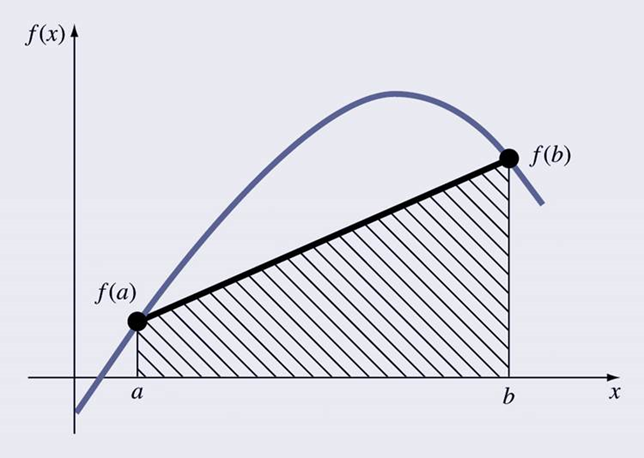
</div>
<!---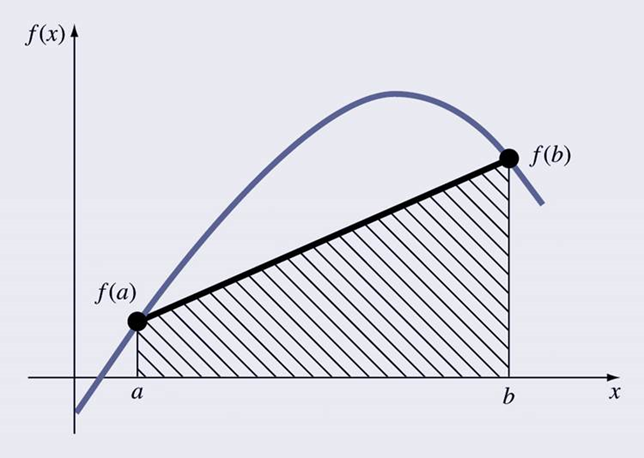--->

## method 1: Trapezoidal rule

replace $f(x)$ as a linear function
$I\approx\int_a^bp_1(x)dx$ where $p_1(x)$ is the first order interpolation function between 
data points $(a,f(a))$ and $(b,f(b))$, the first order polynimial is $p_1(x)=a_1x+a_0$, so the slope is
$a_1=\dfrac{f(b)-f(a)}{b-a}$
the intercept can be found as $f(a)=\dfrac{f(b)-f(a)}{b-a}a+a_0$, so we get $a_0=f(a)-\dfrac{f(b)-f(a)}{b-a}a$
so the integral is
$I\approx\int_a^bp_1(x)dx=\int_a^ba_1x+a_0dx=\dfrac{f(a)+f(b)}{2}(b-a)$

## error

The error associated with the Trapezoidal rule is $E_t=-\dfrac{1}{12}f''(\xi)(b-a)^3$
## method 1-extension: composite trapezoidal 
use multiple trapezoials to approximate the area/integral
<div>
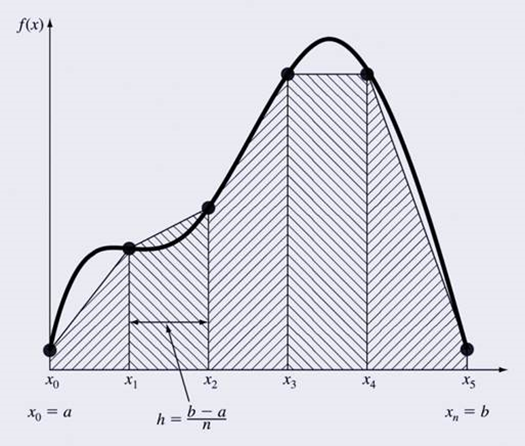
</div>
The formula to approximate $I\approx I_n=\sum_{i=0}^{n-1} I_i=\sum_{i=0}^{n-1}\dfrac{f(x_i)+f(x_{i+1})}{2}h$, $n$ is the number of trapezoidals, there are $n+1$ points starting from $x_0, x_1, ... x_n$

In other words,
$$I\approx I_n=\sum_{i=0}^{n-1} I_i=\dfrac{h}{2}(f(x_0)+2\sum_{i=1}^{n-1}f(x_i)+f(x_n))$$

## error for composite trapezoidal
$E_{tn}=-\dfrac{(b-a)^3}{12n^2}\bar{f''}$, where $\bar{f''}=\dfrac{1}{n}\sum f"(\xi_i)$

## Method 2: 1/3 simpson or 3/8 simpson rule
<div>
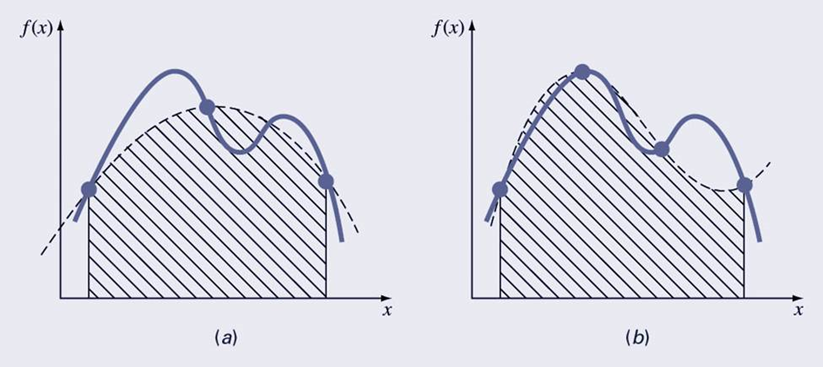
</div>

To improve the accuracy of the integral, we can use multiple points to find a higher order interpolation function 
$I\approx I_{2nd}=\int_a^bp_2(x)dx=\int_a^b[\sum_{i=1}^3L_i(x)f(x_i)]dx$
recall
$L_i(x)=\Pi_{j=1,j\neq i}^n\dfrac{x-x_j}{x_i-x_j}$

After a little bit of algebra, you will
$$I=\dfrac{h}{3}[f(x_0)+4f(x_1)+f(x_2)]$$, this is the celebrated 1/3 simpson's rule
the error is $$E_a=-\dfrac{(b-a)^5}{2880}\bar{f}^{(4)}$$, $h=(b-a)/2$


The 3/8 rule 

$$I=\dfrac{3h}{8}[f(x_0)+3f(x_1)+3f(x_2)+f(x_3)] $$
the error is $$E_a=-\dfrac{(b-a)^5}{6480}\bar{f}^{(4)}$$, $h=(b-a)/3$



## Example
consider $$I=\int_0^3x^2dx=9$$
if we want to approximate the integration with 2 ending points $(0,0),(3,9)$. 

## discusssion
it gives us the true value for $f(x)=x^2$ because the 2nd polynomial $p_2(x)$ will recover the exact same form as $f(x)$

In [28]:
clear
f =@(x) x^2 % define my function f(x)=x^2
%% to evaluate I=\int_0^3 f(x)dx
a=0;
b=3;
h=b-a;
h_oneThird = h/2;
h_3eight = h/3;

I_trap = (f(a)+f(b))/2*h
I_com_trap = ((f(a)+f(a+h_oneThird))/2 + (f(a+h_oneThird)+f(a+2*h_oneThird))/2)*h_oneThird
I_oneThird = h_oneThird/3*(f(a)+4*f((a+b)/2)+f(b))
I_3eight = 3*h_3eight*(f(a)+f(b)+3*f(a+h_3eight)+3*f(a+2*h_3eight))/8


f =

@(x) x ^ 2

I_trap =  13.50000000000000
I_com_trap =  10.12500000000000
I_oneThird =  9
I_3eight =  9


In [11]:
format long
I_oneThird


I_oneThird =  9


In [23]:
1/4*3^4-1/4*1^4

ans =  20


# Example 
$$I=\int_0^\pi \sin x dx$$

## Trapzoidal method
$$I=\dfrac{f(a)+f(b)}{2}(b-a)$$

## 1/3 simpson rule
$$I=\dfrac{h}{3}[f(x_0)+4f(x_1)+f(x_2)]$$, where $x_0=a, x_1=(a+b)/2, x_2=b$

In [11]:
% define a function 
clear;clc;
format long
f =@(x) sin(x) % 
I_true = 2;
b = pi
a = 0
I_trap = (f(a)+f(b))/2*(b-a) % approximated using a single Trapezoid

%% 1/3 simpson rule
x0=a;
x1 = (a+b)/2;
x2 = b;
h = (b-a)/2
I_one3rdSimp = h/3*(f(x0)+4*f(x1)+f(x2))

%% composite trap rule for 2 segments
I_trap_2 = 1/2*(b-a)/2*(f(a)+2*f(x1)+f(b))

err_one3rdSimp = abs(I_one3rdSimp - I_true)/I_true % absolute relative error
err_trap_2 = abs(I_trap_2- I_true)/I_true

f =

@(x) sin (x)

b = 3.141592653589793
a = 0
I_trap = 1.923670693721790e-16
h = 1.570796326794897
I_one3rdSimp = 2.094395102393195
I_trap_2 = 1.570796326794897
err_one3rdSimp = 4.719755119659763e-02
err_trap_2 = 0.214601836602552


## Composite trapezoids 
Obviously it is too rude to approximate the integral using one trapezoid, we did it with two trapezoids as shown above manually. However, it would be great if we can write a function `CompTrap` to calcuate it with an arbitrary number of trapezoids. 

When write a function, we need to figure out what the inputs and outputs are. Obviously the integral result has to be an output, as denoted as `I`, for inputs, we need the bounds of the integral `a,b`, the integrand `f`, and it is a good idea to put the number of trapezoids there, as denoted as `n`. So the first line of the function is like

`function [I]=CompTrap(f,a,b,n)`

In [20]:
function [I]=CompTrap(f,a,b,n)
h = (b-a)/n; % n is the number of segments
x = linspace(a,b,n+1);
I = 0;

for i = 2:n % internal points
    I = I + f(x(i));
end
    I = 2*I; % 2 times
    I = I + f(a) + f(b); % add both ends
    I = 1/2*h*I; % scale by h/2
end

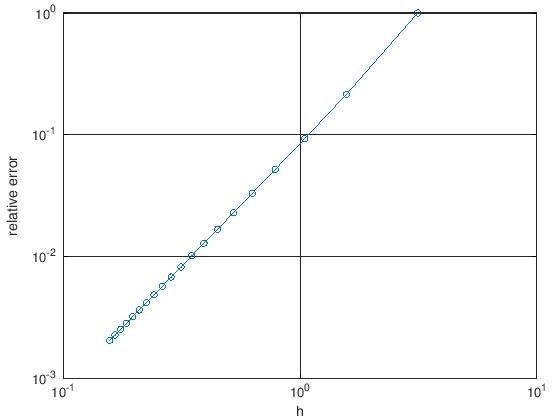

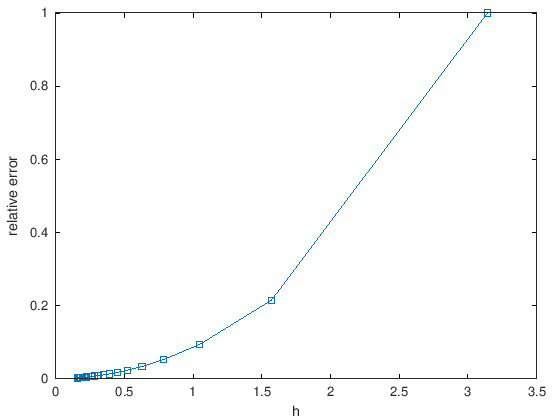

In [28]:
n=20;
for j = 1:1:n % try a number of trapezoids
[I(j)]=CompTrap(f,a,b,j); % for save each approximation
err(j)=abs(I(j)- I_true)/I_true; % calcuate the error
end

j =  1:1:n;
h_sz = (b-a)./j;
figure;
plot(h_sz,err,'s-') % this figure shows how the error chagne with the number of trapezoids
xlabel('h')
ylabel('relative error')
figure;
loglog(h_sz,err,'o-') % loglog plot, what should be the slope of the line?
grid on
xlabel('h')
ylabel('relative error')